# Rotation Matrices

### In this notebook, I will be showing how to rotate equations in a 2d and 3d space

#### Rotation in 2D

$ 2D(\theta) = \Large \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{bmatrix} $

#### Rotation in 3D

$  3D(\theta_x) = \Large \begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\theta) & -sin(\theta) \\ 0 & sin(\theta) & cos(\theta) \end{bmatrix} $

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


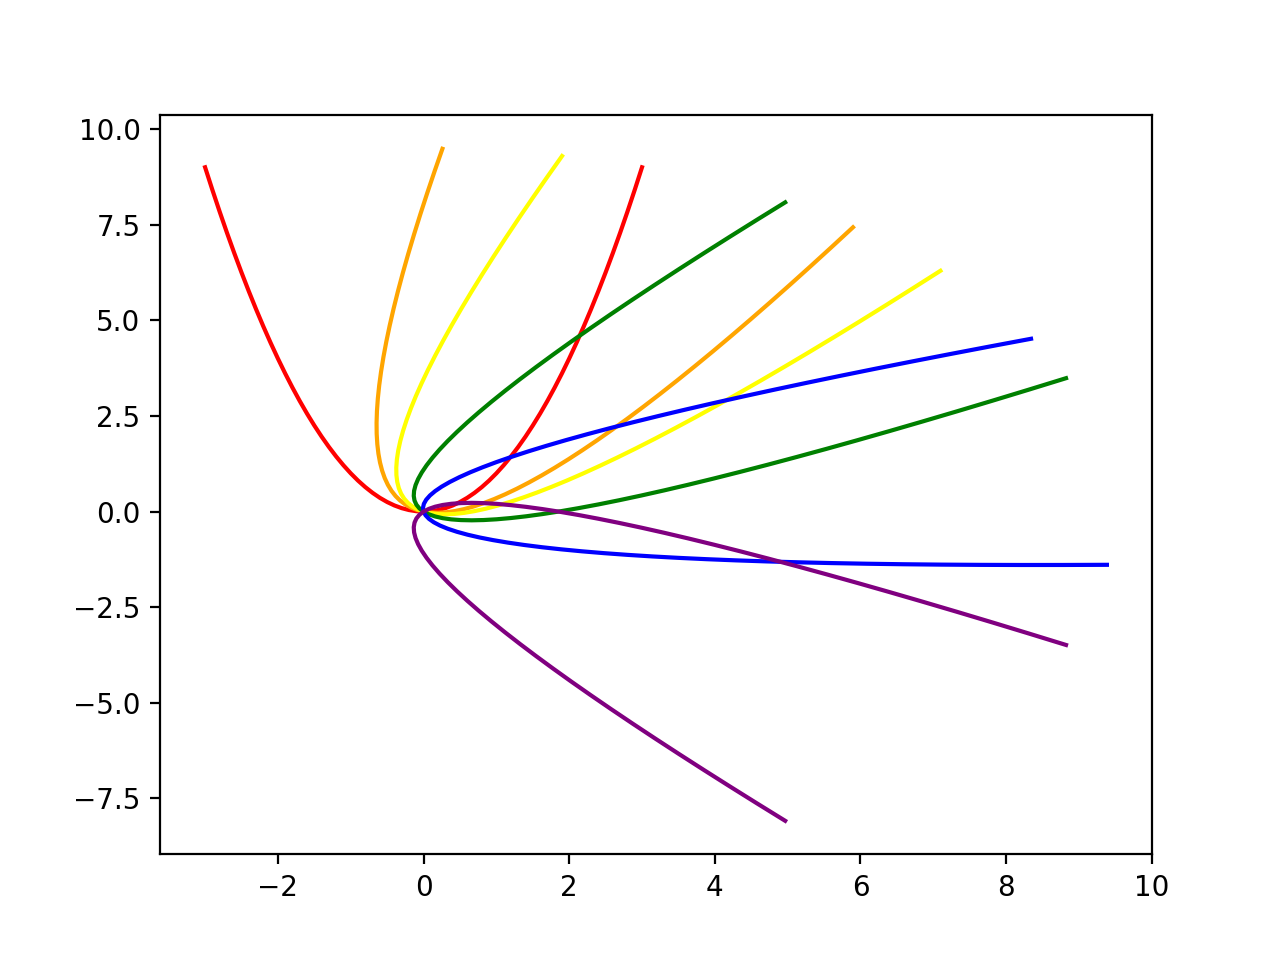

In [7]:
def rotate2D(xi, yi, theta):
    theta *= np.pi/180
    xmat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    ux, uy = [], []
    for i in range(len(xi)):
        t = np.array([xi[i], yi[i]])
        z = xmat.dot(t)
        ux.append(z[0])
        uy.append(z[1])
    return ux, uy
    
fx1 = lambda x: x**2    
    
x1 = np.arange(-3, 3.1, 0.1)
y1 = fx1(x1)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

colors = ('red','orange','yellow','green','blue','purple')
angles = (0, 20, 30, 50, 80, 130)

for color, theta in zip(colors, angles):
    px, py = rotate2D(x1, y1, -theta)
    ax1.plot(px, py, color=color)
    
plt.show()

<IPython.core.display.Javascript object>


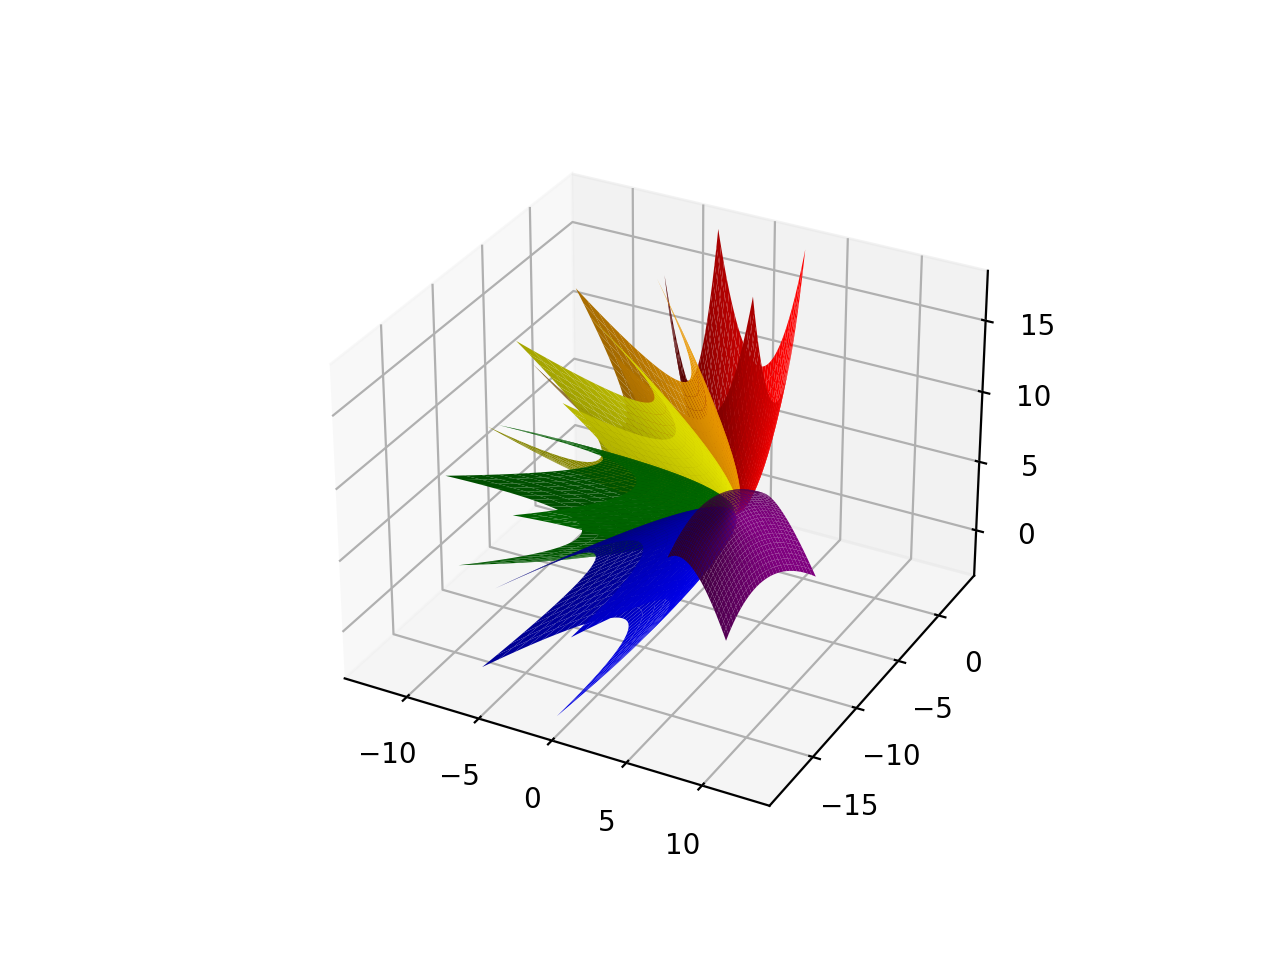

In [10]:
def rotate3D(xi, yi, zi, theta):
    theta *= np.pi/180
    xrotate = np.array([[1, 0, 0],
                        [0, np.cos(theta), -np.sin(theta)],
                        [0, np.sin(theta), np.cos(theta)]])
    
    yrotate = np.array([[np.cos(theta), 0, -np.sin(theta)],
                        [0, 1, 0],
                        [np.sin(theta), 0, np.cos(theta)]])
    
    gx, gy, gz = [], [], []
    tx, ty, tz = [], [], []
    for i in range(len(xi)):
        tx, ty, tz = [], [], []
        for j in range(len(xi[0])):
            b = np.array([xi[i][j], yi[i][j], zi[i][j]])
            zk = yrotate.dot(xrotate.dot(b))
            tx.append(zk[0])
            ty.append(zk[1])
            tz.append(zk[2])
        gx.append(tx)
        gy.append(ty)
        gz.append(tz)
    return [np.array(i) for i in (gx, gy, gz)]

fx2 = lambda x, y: x**2 + y**2

xu, yu = np.meshgrid(x1, x1)
zu = fx2(xu, yu)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

for color, theta in zip(colors, angles):
    vx, vy, vz = rotate3D(xu, yu, zu, theta)
    ax2.plot_surface(vx, vy, vz, color=color)
    
plt.show()